In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix
import nltk

import pickle
pd.options.display.float_format = '{:.0f}'.format

In [2]:
#Load in data and split for train and test sets
df = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')
X_train, X_test, y_train, y_test = train_test_split(df['clean_text_sl'], df['Hate'], test_size=0.25, random_state=12)
                                                       
df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0


In [3]:
#create Count matrix
count = CountVectorizer()
count_train = count.fit_transform(X_train)
count_test = count.transform(X_test)

## Default LR

In [4]:
default_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

In [5]:
# train classifier
print("training...")
default_LR.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_LR_test_preds = default_LR.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [6]:
LR_metrics = {}
default_LR_precision = precision_score(y_test, default_LR_test_preds)
default_LR_recall = recall_score(y_test, default_LR_test_preds)
default_LR_macro_f1_score = f1_score(y_test, default_LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_LR_precision))
print('Recall: {:.3}'.format(default_LR_recall))
print('Macro F1 Score: {:.3}'.format(default_LR_macro_f1_score))

LR_metrics['Default LR'] = {'precision': default_LR_precision, 'recall': default_LR_recall, 
                            'macro_f1': default_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.786
Recall: 0.625
Macro F1 Score: 0.822


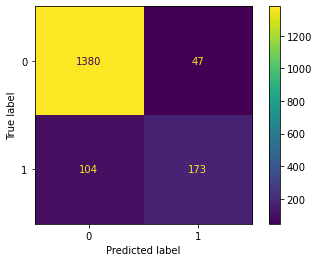

In [7]:
plot_confusion_matrix(default_LR, count_test, y_test)

## Grid Search LR

In [8]:
default_grid_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'penalty': ['l1', 'l2', 'elasticnet'],  
              'dual': [True, False], 
              'C': [1, 10, 30],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# grid search with f1 being the performance metric
grid_LR = GridSearchCV(default_grid_LR, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
grid_LR.fit(count_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, d

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t


[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, clas

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.834, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.832, total=   0.6s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.807, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.831, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.800, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.838, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.828, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.808, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.832, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.801, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, sol

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.842, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.821, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.788, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.832, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.775, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.833, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.818, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.791, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.828, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.792, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.847, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.819, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.795, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.826, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.772, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elastic

[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs .
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 445, in _check_solver
    raise ValueError("Solver %s supports only "
ValueError: Solver lbfgs supports only dual=False, got dual=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estima


[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.822, total=   1.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.848, total=   0.9s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.813, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.825, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.809, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.817, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.841, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.808, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.824, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.813, total=   0.0s
[CV] C=1, cl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.832, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.845, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.816, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.823, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.824, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.830, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.844, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.818, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.828, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.819, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.831, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.845, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.821, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.826, total=   0.0s
[CV] C=1, class_weigh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.819, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.820, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.792, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.829, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.791, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=Tr

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.833, total=   5.9s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.828, total=   4.1s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.805, total=   5.7s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.835, total=   5.5s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.802, total=   5.6s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.815, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.828, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.790, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.829, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.793, total=   0.0s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.808, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.828, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.791, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.828, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.814, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.812, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.834, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.800, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.819, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.820, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.792, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.829, total=   0.0s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.790, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=elasticnet, solver=newton-cg 
[CV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selectio

[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.826, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.840, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.800, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.832, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.801, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.827, total=   5.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.839, total=   3.9s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.805, total=   5.5s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.837, total=   5.6s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.821, total=   5.7s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.811, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.836, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.794, total=   5.8s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.827, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.796, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.827, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.840, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.800, total=   0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.840, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.800, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.830, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.801, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.832, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.836, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.799, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.839, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.822, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.830, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.836, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.806, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.844, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Val

[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.818, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.827, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.840, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.800, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.830, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.801, total=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selectio


[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.789, total=   0.1s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.827, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.791, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=None, dual=True, 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.831, total=   8.4s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.819, total=   7.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.812, total=   8.6s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.834, total=   8.4s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.798, total=   7.9s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.812, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.819, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.797, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.841, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.783, total=   0.0s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.817, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.789, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.829, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.789, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.820, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.803, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.808, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.831, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.790, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.830, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.816, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.812, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.834, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.798, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.816, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.817, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.789, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.829, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=lbfgs, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag ..
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag ..
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag ..
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag ..
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag ..
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=saga .
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.828, total=   8.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.833, total=   6.7s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.806, total=   8.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.839, total=   8.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.816, total=   8.3s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.805, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.823, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.830, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.793, total=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.834, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.795, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.826, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.796, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.827, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.831, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.800, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.836, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.816, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.831, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.834, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.805, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.843, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.816, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.829, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.834, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.795, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.826, total=   0.0s
[CV] C=30,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='f1_macro', verbose=3)

In [9]:
#print best score obtained and the parameters which obtained it
print('Macro F1 Score:', grid_LR.best_score_)
print('Best Hyperparameters:', grid_LR.best_params_)
print('Model object with best parameters: ')
print(grid_LR.best_estimator_)

Macro F1 Score: 0.8294187460746814
Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'dual': True, 'penalty': 'l2', 'solver': 'liblinear'}
Model object with best parameters: 
LogisticRegression(C=1, class_weight='balanced', dual=True, random_state=12,
                   solver='liblinear')


In [10]:
# train classifier
print("training...")
grid_LR.best_estimator_.fit(count_train, y_train)
print("complete.")
# use classifier to predict on test set
print("predicting...")
LR_test_preds = grid_LR.best_estimator_.predict(count_test)
print("complete.")

training...
complete.
predicting...
complete.


In [11]:
grid_LR_precision = precision_score(y_test, LR_test_preds)
grid_LR_recall = recall_score(y_test, LR_test_preds)
grid_LR_macro_f1_score = f1_score(y_test, LR_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(grid_LR_precision))
print('Recall: {:.3}'.format(grid_LR_recall))
print('Macro F1 Score: {:.3}'.format(grid_LR_macro_f1_score))

LR_metrics['Grid LR'] = {'precision': grid_LR_precision, 'recall': grid_LR_recall, 
                            'macro_f1': grid_LR_macro_f1_score}

Model evaluation metrics
Precision: 0.664
Recall: 0.715
Macro F1 Score: 0.813


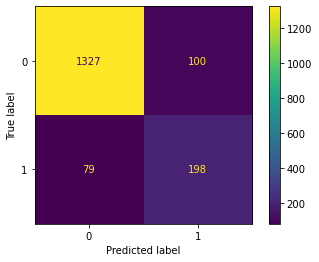

In [12]:
plot_confusion_matrix(grid_LR, count_test, y_test)

## Default LR with POS tags

In [13]:
#create a column of pos tagged words in each tweet
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

tweets = df.clean_text
tweet_tags = []

for t in tweets:
    tokens = nltk.word_tokenize(t)
    tags = nltk.pos_tag(tokens)
    new_text = []
    for word in tags:
        new_text.append(word[0] + "_" + word[1])
    tweet_tags.append(new_text)
    
tagged_tokens = []
for tweet in tweet_tags:
    sent = ' '.join(tweet)
    new_tokens = tokenizer.tokenize(sent)
    tagged_tokens.append(new_tokens)
    
df['pos_tags'] = tagged_tokens
df['pos_tags'] = df['pos_tags'].apply(lambda x: ' '.join(map(str, x)))

df.head(5)

,id,text,Annotation,clean_text,clean_text_sl,Hate,pos_tags
0,596965466238619648,I just found the *perfect* rental. Why can't m...,Neither,i just found the perfect rental why cant my le...,found perfect rental cant lease right,0,i_NN just_RB found_VBD the_DT perfect_JJ renta...
1,575891807873040384,"@wetsprocket every time they ""discover"" anythi...",Neither,every time they discover anything its either ...,every time discover anything either incorrect ...,0,every_DT time_NN they_PRP discover_VBP anythin...
2,595259457828884480,ok time to write code bbl.\n\nmaking a new thing.,Neither,ok time to write code bbl\n\nmaking a new thing,ok time write code bbl making new thing,0,ok_JJ time_NN to_TO write_VB code_NN bbl_NN ma...
3,572344911002927104,Refined dessert! NOT #MKR,Neither,refined dessert not mkr,refined dessert mkr,0,refined_VBN dessert_NN not_RB mkr_VB
4,568132033215475712,@furt1v3ly @ClarkHat One of the best things an...,Neither,one of the best things anyone can do to impr...,one best thing anyone improve understanding gr...,0,one_CD of_IN the_DT best_JJS things_NNS anyone...


In [14]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(df['pos_tags'], df['Hate'], test_size=0.25, random_state=12)
                                                       
count_train_pos = count.fit_transform(X_train_pos)
count_test_pos = count.transform(X_test_pos)

In [15]:
default_LR_POS = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

In [16]:
# train classifier
print("training...")
default_LR_POS.fit(count_train_pos, y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
default_LR_POS_test_preds = default_LR_POS.predict(count_test_pos)
print("complete.")

training...
complete.
predicting...
complete.


In [17]:
default_LR_POS_precision = precision_score(y_test, default_LR_POS_test_preds)
default_LR_POS_recall = recall_score(y_test_pos, default_LR_POS_test_preds)
default_LR_POS_macro_f1_score = f1_score(y_test_pos, default_LR_POS_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(default_LR_POS_precision))
print('Recall: {:.3}'.format(default_LR_POS_recall))
print('Macro F1 Score: {:.3}'.format(default_LR_POS_macro_f1_score))

LR_metrics['Default LR with POS'] = {'precision': default_LR_POS_precision, 'recall': default_LR_POS_recall, 
                            'macro_f1': default_LR_POS_macro_f1_score}

Model evaluation metrics
Precision: 0.738
Recall: 0.538
Macro F1 Score: 0.78


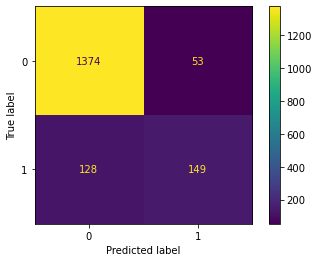

In [18]:
plot_confusion_matrix(default_LR_POS, count_test_pos, y_test_pos)

## Grid Search LR with POS

In [19]:
default_grid_LR = LogisticRegression(penalty='l2', dual=False, C=1, class_weight=None, 
                                solver='lbfgs', random_state=12)

# dictionary containing the parameters which will be used for grid search
grid_search_params={'penalty': ['l1', 'l2', 'elasticnet'],  
              'dual': [True, False], 
              'C': [1, 10, 30],
              'class_weight': [None, 'balanced'],
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear']}

# grid search with f1 being the performance metric
POS_grid_LR = GridSearchCV(default_grid_LR, grid_search_params, cv=5, scoring='f1_macro', verbose=3)
POS_grid_LR.fit(count_train_pos, y_train_pos)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg .
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on t


[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs .....
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=sag .......
[CV]  C=1, class_weight=None, dual=True, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=True, penalty=l1, solver=sag .......
[CV]  C=1, class_weight

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.817, total=   1.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.812, total=   0.7s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.789, total=   0.9s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.766, total=   0.9s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.761, total=   0.9s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.826, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.817, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.800, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.785, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.781, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, sol

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.800, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.780, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.743, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=sag ......
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.747, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.798, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.792, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.779, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.744, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=saga .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.748, total=   0.1s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.800, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.800, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.782, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.751, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.749, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elastic

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV]  C=1, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=1, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elasticnet, solver=saga 
[CV]  C=1, class_weight=None, dual=False, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elasticnet, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elasticnet, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=1, class_weight=None, dual=False, penalty=elasticnet, solver=liblinear 
[CV]  C=1, class_weight=None, dual=False, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s

[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.781, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.803, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=True, penalty=elasticnet, solve

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.804, total=   1.7s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.840, total=   1.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.794, total=   1.7s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.789, total=   1.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.811, total=   1.6s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.814, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.845, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.803, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.801, total=   6.2s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.813, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.817, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.793, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.784, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=newton-cg, score=0.803, total=   0.1s
[CV] C=

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.813, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.820, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.790, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag ..


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.807, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.810, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.826, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.781, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.788, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga .
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.808, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.811, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.820, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.793, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=1, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.781, total=   0.1s
[CV] C=1, class_weigh

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs 
[CV]  C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag 
[CV]  C=1, class_weight=balanced, dual=False, penalty=elasticnet, solver=sag, scor

[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.791, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.779, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.768, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=True, penalty=l2, solver=liblinear, score=0.754, total=   0.1s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, class_weight

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.811, total=   7.4s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.803, total=   5.2s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.784, total=   7.7s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.753, total=   7.4s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=saga ....
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.763, total=   7.5s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.817, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.820, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.797, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.804, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.791, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.779, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.768, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=newton-cg, score=0.754, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.804, total=   0.3s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.791, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.779, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.768, total=   0.2s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.754, total=   0.3s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.807, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.792, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.777, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.771, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.768, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.807, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.792, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.781, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.760, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.763, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.804, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.791, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.779, total=   0.1s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.768, total=   0.0s
[CV] C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.754, total=   0.1s
[CV] C=10, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.810, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.816, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.778, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.788, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.781, total=   0.1s
[CV] C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=10, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.810, total=   8.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.817, total=   6.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.781, total=   8.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.788, total=   7.7s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.805, total=   7.8s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.807, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.831, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.799, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.803, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.792, total=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.810, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.816, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.778, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.788, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.781, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.813, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.805, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.777, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.767, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.790, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.813, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.814, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.778, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.775, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.799, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.810, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.816, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.778, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.788, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=10, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.781, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_


[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=sag ......
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=sag ......
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=sag ......
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=True, penalty=l2, solver=saga .....
[CV]  C=30, class_weight=None, dual=True, penalty=l2, solver=saga, score=nan, total=   0.0s
[CV] C=30, class_weight=

[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.806, total=  11.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.797, total=   8.6s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.781, total=  10.7s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.761, total=  11.7s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=saga, score=0.765, total=  11.5s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.809, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.820, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.791, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.800, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l1, solver=liblinear, score=0.784, total=   0.0s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.800, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.788, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.774, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.776, total=   0.3s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs ...


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=lbfgs, score=0.755, total=   0.2s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.807, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.792, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.777, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.767, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=sag .....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=sag, score=0.767, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.807, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.791, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.782, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.761, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=saga ....


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=saga, score=0.763, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.800, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.788, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.774, total=   0.1s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.776, total=   0.0s
[CV] C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=None, dual=False, penalty=l2, solver=liblinear, score=0.755, total=   0.0s
[CV] C=30, class_weight=None, dual=False, pen

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.798, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.811, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.781, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.790, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=True, penalty=l2, solver=liblinear, score=0.772, total=   0.1s
[CV] C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg 
[CV]  C=30, class_weight=balanced, dual=True, penalty=elasticnet, solver=newton-cg, score=nan, total= 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.815, total=  11.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.805, total=   8.6s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.780, total=  11.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.780, total=  11.5s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=saga, score=0.804, total=  11.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.795, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.819, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.798, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.803, total=   0.0s
[CV] C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l1, solver=liblinear, score=0.786, total=   0.0s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.796, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.813, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.781, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.790, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=lbfgs, score=0.772, total=   0.2s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.809, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.796, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.778, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.767, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag .
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=sag, score=0.787, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.813, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.809, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.780, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.777, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=saga, score=0.803, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.796, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.814, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.781, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.790, total=   0.1s
[CV] C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear 
[CV]  C=30, class_weight=balanced, dual=False, penalty=l2, solver=liblinear, score=0.772, total=   0.1s
[

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, random_state=12),
             param_grid={'C': [1, 10, 30], 'class_weight': [None, 'balanced'],
                         'dual': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='f1_macro', verbose=3)

In [20]:
# train classifier
print("training...")
POS_grid_LR.best_estimator_.fit(count_train_pos, y_train_pos)
print("complete.")
# use classifier to predict on test set
print("predicting...")
LR_grid_POS_test_preds = POS_grid_LR.best_estimator_.predict(count_test_pos)
print("complete.")

training...
complete.
predicting...
complete.


In [21]:
LR_grid_pos_precision = precision_score(y_test_pos, LR_grid_POS_test_preds)
LR_grid_pos_recall = recall_score(y_test_pos, LR_grid_POS_test_preds)
LR_grid_POS_macro_f1_score = f1_score(y_test_pos, LR_grid_POS_test_preds, average='macro')

#model evaluation
print('Model evaluation metrics')
print('Precision: {:.3}'.format(LR_grid_pos_precision))
print('Recall: {:.3}'.format(LR_grid_pos_recall))
print('Macro F1 Score: {:.3}'.format(LR_grid_POS_macro_f1_score))

LR_metrics['Grid Search LR with POS'] = {'precision': LR_grid_pos_precision, 'recall': LR_grid_pos_recall, 
                        'macro_f1': LR_grid_POS_macro_f1_score}

Model evaluation metrics
Precision: 0.636
Recall: 0.7
Macro F1 Score: 0.799


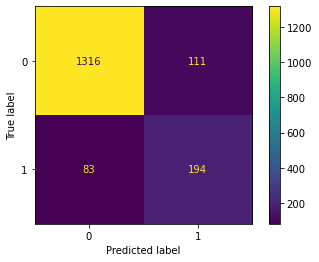

In [22]:
plot_confusion_matrix(POS_grid_LR.best_estimator_, count_test_pos, y_test_pos)

In [23]:
#compare parameters
results = pd.DataFrame.from_dict(LR_metrics, orient='index')
results.to_csv(r"C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Results\LR_count_results.csv",
               index=True)

In [24]:
pd.options.display.float_format = '{:.4f}'.format
results

,precision,recall,macro_f1
Default LR,0.7864,0.6245,0.8222
Grid LR,0.6644,0.7148,0.8128
Default LR with POS,0.7376,0.5379,0.7802
Grid Search LR with POS,0.6361,0.7004,0.7990
